<a href="https://colab.research.google.com/github/mrza12/Latihan-OCR/blob/main/test_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ekstrasi Gambar to Text**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 3s (2,059 kB/s)
debconf: unable to ini

In [3]:
  def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34721402097900001 Sk,
Nama RIYANTO. SE £ PA
Tempat/Tgl Lahir : GROBOGAN. 02-09-1979 “ "
Jenis Kelamin LAKI-LAKI GolDarah - 0 "
Alamat PRM PURI DOMAS D-3. SEMPU

RT/RW 001 1024

Kel/Desa WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama :ISLAM

Status Perkawinan: KAWIN ENY
Pekerjaan : PEDAGANG 08 6.20 »
Kewarganegaraan: WNI N

Berlaku Hingga 02-09-2017

 



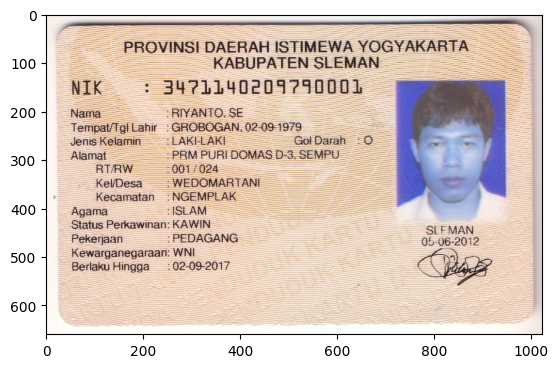

In [16]:
img = cv2.imread("/content/drive/MyDrive/Dataset OCR/ktp-1024x660.jpg")
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
result = pytesseract.image_to_string((threshed), lang="ind")

for word in result.split("\n"):
  if "”—" in word:
    word = word.replace("”—", ":")
  if "NIK" in word:
    nik_char = word.split()
    if "?" in word:
      word = word.replace("?", "7")
    if "D" in word:
      word = word.replace("D", "0")

  print(word)

In [18]:
from pytesseract import Output

img = cv2.imread('/content/drive/MyDrive/Dataset OCR/ktp-1024x660.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


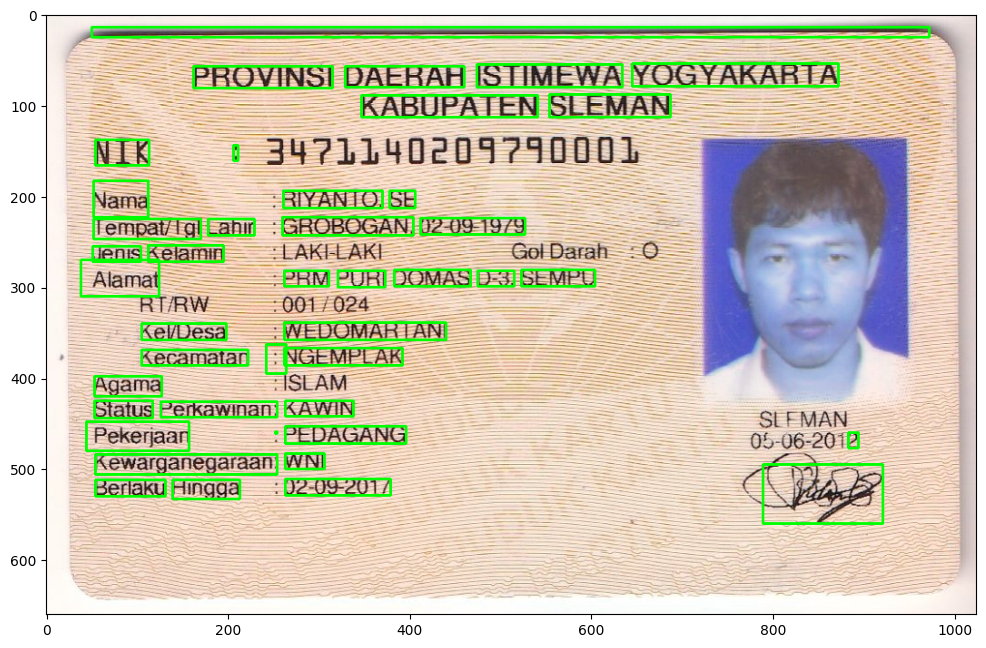

In [19]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)